# With sWeights: `common_B0TODstDs_Dst_constr_BDT{cut_BDT}`
# Without sWeights: `common_B0TODst3pi_Dst_constr_BDT{cut_BDT}`

## Fit the complete data (With sWeights and without sWeights)

WITH A LOOP IMPLEMENTED.

This file fits the constrained sWeighted or not $m(D^*3\pi)$ invariant mass for different cuts on the BDT variable

- Fit on $m(B^0_s)$ with $m(3\pi)$ around $m(D_s)$ and sWeights
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (gaussian)
    - Background of partially reconstructed decays (gaussian)
    - Combinatorial background (exponential)

- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (sum of two Crystall ball PDF)
        * The tail parameters $n_L$, $\alpha_L$, $\alpha_R$ and $n_R$ are fixed
    - Background $B^0 \to D^{*-} D_s^+$ from the other fit of the simultaneous fit
    - Background with a misidentified pion: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$ (sum of two crystall ball PDF)
    - Combinatorial background (exponential)

        The ratio of yield $\frac{n_{B^0 \to D^{*-} K^+ \pi^+ \pi^-}}{n_{B^0 \to D^{*-} \pi^+ \pi^+ \pi^-}}$is fixed at the value found without any cut on the BDT output.

Those two fits are not simultaneous

Computation of the number of events below the peak.

We define $\sigma_L$ and $\sigma_R$, the standard deviation of the Crystall ball signal PDFs obtained with the full common with only the $143\ MeV < \Delta M < 148\ MeV$ cut. frac, noted $f$, is such that the total signal shape is $f_S = f_r\times p_L +(1-f) p_R$, where $p_L$ ($p_R$) is the left (right) Crystal ball PDF, with standard deviation $\sigma_L$ ($\sigma_R$). The common mean of the two Crystal Ball PDF is denoted $\mu$

Then, we define the geometrical average $\sigma=\sqrt{(f\sigma_L)^2+((1-f)\sigma_R)^2}$ and the usual average $\sigma_2 = f\times \sigma_L + (1-f) \sigma_R$

The number of combinatorial background under the signal peak, for a given cut_BDT is noted n_B and computed by: $$ n_B=\int_{\mu-3\sigma}^{{\mu+3\sigma}}{dx f_e(x, \lambda_{BDT})} \times n_{B,c} $$ Where $n_{B,c}$ is the number of background events between low and high where the fit is applied. $f_e$ is the exponential combinatorial background PDF. We also compute this quantity for $\sigma_2$, denoted $n_{B2}$ or n_B2.

Those two quantities and their errors are computed and saved together with the fitted parameters.

Finally, after comparison, I'll chose $\sigma_2$ for the optimisation.


In [1]:
name_data = 'common_B0TODst3pi_Dst_constr'
name_data_B0toDstDs = 'common_B0TODstDs_Dst_constr'

name_data_Dstto3pi = 'common_DstTO3pi' # same as sWeights as the unconstrained case

name_BDT = 'gradient'

name_data_MC = 'MC_constr_opposedCB_sharedMean'
name_data_KPiPi = "data_KPiPi_constr"

var = 'Dst_constr_B0_M'

In [2]:
low_DstDs = 5150.
high_DstDs = 5350.

In [3]:
low = 5150.
high = 5545.

## Import

In [4]:
import zfit
import json
import numpy as np
import timeit

from math import sqrt

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)

import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_saved_root, add_constr_Dst, json_to_latex_table, retrieve_params, format_previous_params
import plot.histogram as h 
from plot.fit import plot_hist_fit_particle
from plot.tool import save_file, set_text_LHCb
from fit import launch_fit, define_zparams, save_params, sum_crystalball, check_fit
from variables import name_params, name_params_B0toDstDs


Welcome to JupyROOT 6.22/02


## Load

In [5]:
df_common = load_saved_root('common_'+name_BDT, name_folder='common', vars=['B0_M', 'Dst_M', 'BDT'])
df_common = add_constr_Dst(df_common)
df_common = df_common.drop('B0_M', 1)

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common/common_gradient.root


Loading of $\sigma_R$, $\sigma_L$, frac and $\mu$ of the signal shape, of the common data. Those values will be used to integrate the combinatorial PDF in order to get the number of background under the signal peak.

In [6]:
common_params = retrieve_params(name_data, name_folder=name_data)

sigmaR = common_params['sigmaR']
sigmaL = common_params['sigmaL']
alpha_L = common_params['alphaL']
alpha_R = common_params['alphaR']
n_L = common_params['nL']
n_R = retrieve_params(name_data_MC, name_folder='MC')['nR_MC']
r_bkgK = common_params['r_bkgK']

frac = common_params['frac']
sigm = frac*sigmaL + (1 - frac)*sigmaR
mea = common_params['mu']

print('sigm', sigm)
print('r_bkgK', r_bkgK)

sigm 15.322654351985399
r_bkgK 0.035341458516519916


## BDT

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/gradient/BDTvsB0_M_constr2


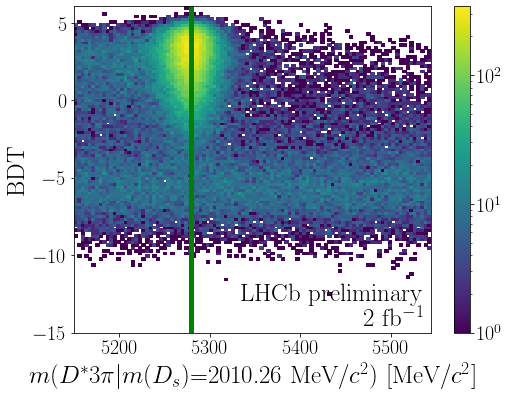

In [7]:
fig, ax = h.plot_hist2d_particle(df_common,[var,'BDT'], low=[low,None],high=[high,None],
            name_folder = name_BDT, log_scale = True, save_fig=False)
ax.axvline(x=5279.53, color='green', linewidth=5.)
ymin, ymax = ax.get_ylim()
ax.set_ylim(-15, ymax)
set_text_LHCb(ax, pos=[0.98, 0.15, 'right'])
save_file(fig, "BDTvsB0_M_constr2",name_BDT)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/gradient/background_BDT_cut_B0_M_constr2


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*3\\pi|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (4 MeV/$c^2$)'>)

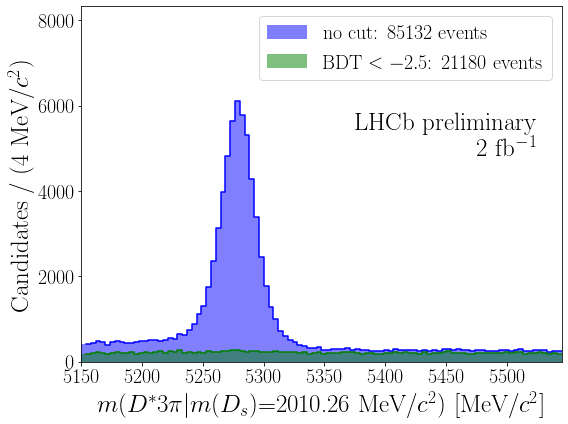

In [8]:
h.plot_hist_particle({'no cut':df_common, 'BDT $<-2.5$':df_common.query('BDT<-2.5')},
          var, n_bins = 100,low = low,high=high,mode_hist=True, 
                       colors=['b', 'g', 'r'], pos_text_LHC=[0.95, 0.70, 'right'],
            name_file = 'background_BDT_cut_B0_M_constr2',name_folder = name_BDT, density=False)

## BDT cuts

Reference fit whose results are taken as the starting values of the new fit. It is specified by cut_BDT_ref, the cut on the BDT output. If None, the reference fit is the one performed without any cut on the BDT output.

In [9]:
# def round_int(n):
#     if n%1==0:
#         return int(n)
#     else:
#         return n

# l_BDT = []
# l_BDT_ref = []
# starting_value = -1.25
# end_value      =  0.25
# step           = 0.25


# value = starting_value
# while value <= end_value:
#     if value==0:
#         value = 0
    
#     l_BDT.append(round_int(value))

#     if value <= -4:
#         l_BDT_ref.append(None)
#     else:
#         BDT_ref = np.round(l_BDT[-1] + 3*step, 4)
#         BDT_ref = round_int(BDT_ref)
#         l_BDT_ref.append(BDT_ref)

#     value = np.round(value + step, 3)

l_BDT = [0]
l_BDT_ref = [0.5]
# for e in l_BDT:
#     l_BDT_ref.append(round_int(e + step))

In [10]:
print(l_BDT_ref)

[0.5]


In [11]:
l_BDT

[0]

## LOOP

================================ cut_BDT = 0 ================================
cut_BDT_ref = 0.5
/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common_DstTO3pi/common_DstTO3pi_BDT0.root
------------------------------------------------------------------
| FCN = -2.931e+05              |     Ncalls=211 (211 total)     |
| EDM = 6.01e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name  

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:526: UserWarning: The function <function Space.limits at 0x7fc2485468c0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5545.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:43: UserWarning: The function <function Space.area at 0x7fc24854acb0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5545.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


Number of d.o.f. in the model:  7
Reduced chi2:  1.5377976144609975


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/Dst_constr_B0_M_common_B0TODst3pi_Dst_constr_details_fit
869.7075332662317
parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_B0TODst3pi_Dst_constr/common_B0TODst3pi_Dst_constr_BDT0_params.json
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_B0TODst3pi_Dst_constr/common_B0TODst3pi_Dst_constr_BDT0_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$f_{\frac{L}{R}}$&$0.403\pm0.020$\\
\hline
$\lambda_{B,c}$&$-0.00254\pm0.00035$\\
\hline
$\mu_S$&$5278.860\pm0.079$\\
\hline
B&$870\pm42$\\
\hline
$n_{B,c}$&$(3.27\pm0.16)\times 10^3$\\
\hline
$n_S$&$(4.931\pm0.026)\times 10^4$\\
\hline
$\sigma_{L, S}$&$10.77\pm0.23$\\
\hline
$\sigma_{R, S}$&$17.75\pm0.21$\\
\hline
\end{tabular}


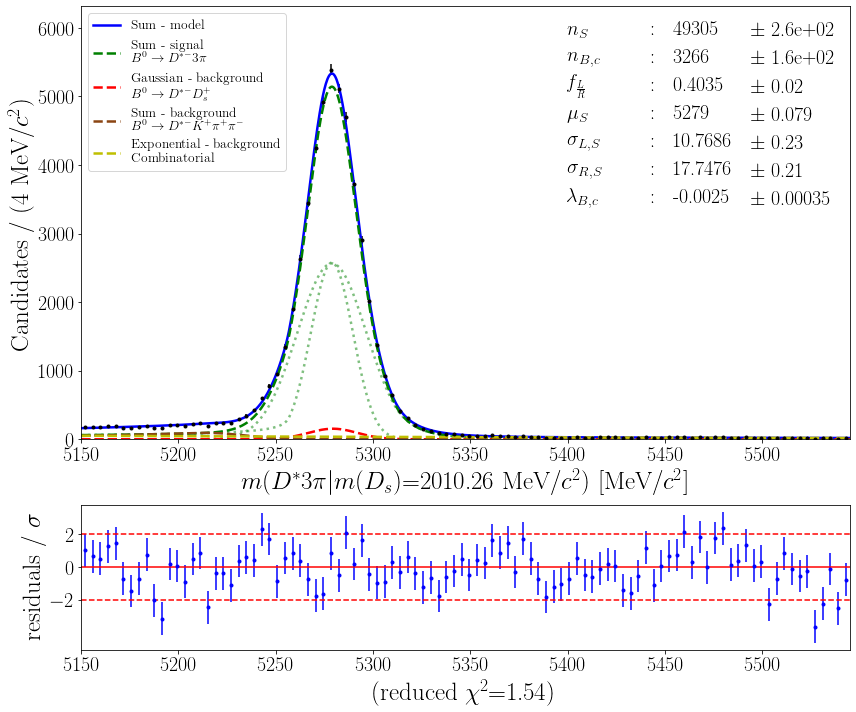

In [12]:
for cut_BDT, cut_BDT_ref in zip(l_BDT, l_BDT_ref):
    
    name_data_BDT = f"{name_data}_BDT{cut_BDT}"
    name_data_B0toDstDs_BDT = f"{name_data_B0toDstDs}_BDT{cut_BDT}"
    
    print(f"================================ cut_BDT = {cut_BDT} ================================")
    print(f"cut_BDT_ref = {cut_BDT_ref}")
    
    ### BDT CUT ========================================================
    k = str(cut_BDT)
    df = df_common.query(f"BDT > {cut_BDT}")
    df_DstDs = load_saved_root(name_data_Dstto3pi+f'_BDT{cut_BDT}', name_folder=name_data_Dstto3pi, vars=[var, 'BDT', 'sWeight'])
    
    
    ### cut_BDT_ref ====================================================
    if cut_BDT_ref is None:
        params_r = retrieve_params(name_data, name_folder=name_data)
#         B0Ds_params_r = retrieve_params(name_data_B0toDstDs, name_folder=name_data_B0toDstDs)
    
    else:
        name_data_BDT_ref = f"{name_data}_BDT{cut_BDT_ref}"
#         name_data_B0toDstDs_BDT_ref = f"{name_data_B0toDstDs}_BDT{cut_BDT_ref}"
        
        params_recup = retrieve_params(name_data_BDT_ref, name_folder=name_data)
        params_r = format_previous_params(params_recup)
    
#         B0Ds_params_recup = retrieve_params(name_data_B0toDstDs_BDT_ref, name_folder=name_data_B0toDstDs)
#         B0Ds_params_r = format_previous_params(B0Ds_params_recup)
    
    
#     ### FIT ON WEIGHTED B0_M WITH  |tau_M-1969|<50 ====================
#     ## Distribution ..........................
# #     h.plot_hist_particle({name_data_B0toDstDs:df_DstDs}, var,
# #               low = low_DstDs, high = high_DstDs, cut_BDT = k,
# #               n_bins = 100, mode_hist = False, colors='black', weights=df_DstDs['sWeight'])
    
#     ## Starting point of the fit .............
#     n_events_DstDs = len(df_DstDs.query(f'{var} > {low_DstDs} and {var} < {high_DstDs}'))


#     n_sig_k = B0Ds_params_r['n_sig_DstDs']
#     n_bkg_k = B0Ds_params_r['n_bkg_DstDs']
#     n_bkg2_k = B0Ds_params_r['n_bkg2_DstDs']

#     initial_values_DstDs = {
#         # Signal
#         'mu_DstDs'       :{ 'value': B0Ds_params_r['mu_DstDs']      , 'low': 5279.-4.       , 'high': 5279.+4.             , 'floating': True},
#         'sigma_DstDs'    :{ 'value': B0Ds_params_r['sigma_DstDs']   , 'low': 15.-5.        , 'high': 15.+5.                , 'floating': True},
#         'n_sig_DstDs'    :{ 'value': n_sig_k                       , 'low': 0              , 'high': n_events_DstDs        , 'floating': True},
#         # Combinatorial background
#         'lambda_DstDs'   :{ 'value': B0Ds_params_r['lambda_DstDs']  , 'low': -0.1           , 'high': -0.0000000000000001  , 'floating': True},
#         'n_bkg_DstDs'    :{ 'value': n_bkg_k                       , 'low': 0              , 'high': n_events_DstDs        , 'floating': True},
#         # Partially reconstructed particles
#         'mu2_DstDs'      :{ 'value': B0Ds_params_r['mu2_DstDs']   , 'low': 4800.          , 'high': 5180.                  , 'floating': True},
#         'sigma2_DstDs'   :{ 'value': B0Ds_params_r['sigma2_DstDs']  , 'low': 10.            , 'high': 90.                  , 'floating': True},
#         'n_bkg2_DstDs'   :{ 'value': n_bkg2_k                      , 'low': 0              , 'high': n_events_DstDs        , 'floating': True},
#     }
    
#     ## Observable and variables ...................
    
#     obs_DstDs = zfit.Space("x", limits=(low_DstDs, high_DstDs))

#     zparams_DstDs = define_zparams(initial_values_DstDs, cut_BDT=cut_BDT)
#     ## Name of the params .........................
#     name_params_B0toDstDs_BDT = {}
#     for key, value in name_params_B0toDstDs.items():
#         name_params_B0toDstDs_BDT[f"{key}|BDT{cut_BDT}"] = value
    
#     ## PDFs .....................................
#     gaussianS_DstDs = zfit.pdf.Gauss(zparams_DstDs[f'mu_DstDs'],zparams_DstDs['sigma_DstDs'],obs=obs_DstDs)
#     exponential_DstDs = zfit.pdf.Exponential(zparams_DstDs['lambda_DstDs'], obs=obs_DstDs)
#     gaussian_DstDs = zfit.pdf.Gauss(zparams_DstDs['mu2_DstDs'],zparams_DstDs['sigma2_DstDs'],obs=obs_DstDs)

#     gaussianS_DstDs_ext = gaussianS_DstDs.create_extended(zparams_DstDs['n_sig_DstDs'])
#     exponential_DstDs_ext = exponential_DstDs.create_extended(zparams_DstDs['n_bkg_DstDs'])
#     gaussian_DstDs_ext = gaussian_DstDs.create_extended(zparams_DstDs['n_bkg2_DstDs'])

#     model_DstDs = zfit.pdf.SumPDF([gaussianS_DstDs_ext, exponential_DstDs_ext, gaussian_DstDs_ext])
#     data_DstDs = zfit.Data.from_pandas(df_DstDs[var], obs=obs_DstDs, weights=df_DstDs['sWeight']) 
    
#     ## Do the fit ...............................
#     start = timeit.default_timer()
#     result_DstDs, params_DstDs = launch_fit( model_DstDs, data_DstDs, extended=True)
#     result_DstDs, params_DstDs = launch_fit( model_DstDs, data_DstDs, extended=True)
#     stop = timeit.default_timer()
#     print('Time to do the fit: ', stop - start)    
#     fit_ok = check_fit(result_DstDs)
#     if not fit_ok:
#         print(f'=========================================== FIT {cut_BDT} NOT OK =============================================')
    
#     ## Plot and save the fit ....................
#     plot_hist_fit_particle(df_DstDs,var, models = [model_DstDs, gaussianS_DstDs_ext, gaussian_DstDs_ext, exponential_DstDs_ext],
#                        name_models = ["", '\n $B^0\\to D^{*-}D_s^+$','\n $B^0\\to D^{*-}D_s^+ h$',
#                                       '\n Combinatorial'],
#                        obs=obs_DstDs, n_bins = 100, mode_hist = False,
#                        name_data=name_data_B0toDstDs+f'BDT{cut_BDT}'+'_details', name_folder=name_data_B0toDstDs,
#                        colors=['b','r','magenta','y'], weights=df_DstDs['sWeight'],
#                        params=params_DstDs,name_params=name_params_B0toDstDs_BDT,
#                        colWidths=[0.05,0.01,0.05,0.04], show_chi2=True,
#                        fontsize_res = 18.,
#                        fontsize_leg=20)

# #     n_bins=50
# # 
# #     plot_hist_fit_particle(df_DstDs, var, models = [model_DstDs, gaussianS_DstDs_ext, gaussian_DstDs_ext, exponential_DstDs_ext],
# #                            name_models = ["", '\n $B^0\\to D^*D_s$','\n $B^0\\to D^*D_s h$',
# #                                           '\n (combinatorial)'],
# #                            obs=obs_DstDs, n_bins = 50,mode_hist = False,
# #                            name_data = name_data_B0toDstDs+f'BDT{cut_BDT}', name_folder=name_data,
# #                            colors=['b','r','magenta','y'], weights=df_DstDs['sWeight'],
# #                            fontsize_res = 18., pos_text_LHC='right',
# #                            fontsize_leg=20, cut_BDT=cut_BDT)
#     save_params(params_DstDs, name_data_B0toDstDs_BDT, True, {'info_fit':str(result_DstDs.info['original'])}, name_folder=name_data_B0toDstDs)
#     json_to_latex_table(name_data_B0toDstDs_BDT, name_data_B0toDstDs, name_params_B0toDstDs)
    
    ### FIT ON B0_M ============================================================
    ## Distribution ............................
#     h.plot_hist_particle({name_data:df}, var,
#               low = low, high = high, cut_BDT=cut_BDT,
#               n_bins = 100, mode_hist = False, colors='black')

    ## Load data ...............................
    #  Result of the fit on the MC D0S->D*pipipi data with one of the pi misidentified as a kaon
    data_KPiPi_params = retrieve_params(name_data_KPiPi, name_folder='data_KPiPi') # already in MeV 
    data_DstDs_params = retrieve_params(name_data_B0toDstDs_BDT, name_folder=name_data_B0toDstDs)   
    
    ## Starting point of the fit ...............
            
    n_events_B0_M = len(df.query(f'{var} > {low} and {var} < {high}'))

    n_sig_k = params_r['n_sig']
    n_bkg_k = params_r['n_bkg']    

    initial_values = {
        # Signal        
        'mu'       :{ 'value': params_r['mu']               , 'low': 5279.-3.       , 'high': 5279.+3.             , 'floating': True},
        'sigmaL'   :{ 'value': params_r['sigmaL']            , 'low': 5.             , 'high': 15.                  , 'floating': True},
        'sigmaR'   :{ 'value': params_r['sigmaR']            , 'low': 15.            , 'high': 25.                  , 'floating': True},
        'alphaL'   :{ 'value': alpha_L                       , 'low': 0.1            , 'high': 10.                  , 'floating': False},
        'alphaR'   :{ 'value': alpha_R                       , 'low': -10.           , 'high': -0.1                 , 'floating': False},
        'nL'       :{ 'value': n_L                           , 'low': 0.1            , 'high': 10.                  , 'floating': False},
        'nR'       :{ 'value': n_R                           , 'low': 1.             , 'high': 70.                  , 'floating': False},
        'frac'     :{ 'value': params_r['frac']              , 'low': 0.1            , 'high': 1.                   , 'floating': True},
        'n_sig'    :{ 'value': n_sig_k                       , 'low': n_sig_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
        # Combinatorial background        
        'lambda'   :{ 'value': params_r['lambda']            , 'low': -0.1           , 'high': -0.00000001          , 'floating': True},
        'n_bkg'    :{ 'value': n_bkg_k                       , 'low': 0.             , 'high': n_events_B0_M        , 'floating': True},
        # Background decay D*Kpipi    
        'r_bkgK'   :{ 'value': r_bkgK                        , 'low': 0.0001          , 'high': 0.08                , 'floating': False},
    }
    
    for vari in 'muL', 'muR', 'sigmaL', 'sigmaR', 'nL', 'nR', 'alphaL', 'alphaR', 'nL', 'nR', 'fraction':
        initial_values[f'{vari}_K'] = {'value': data_KPiPi_params[vari], 'low': None, 'high': None, 'floating': False}

    for vari in 'mu', 'sigma', 'n_sig' :
        initial_values[f'{vari}_Ds'] = {'value': data_DstDs_params[f'{vari}_DstDs|BDT{cut_BDT}'], 'low': None, 'high': None, 'floating': False}

    ## Observable and variables .................
    obs = zfit.Space("x", limits=(low, high))

    zparams = define_zparams(initial_values, cut_BDT=cut_BDT)

    mult = lambda r, n: r*n
    zparams["n_bkgK"] = zfit.ComposedParameter(f"n_bkgK|BDT{cut_BDT}", mult, params=[zparams['r_bkgK'],zparams['n_sig']])    

    ## Name of the params .......................
    name_params_BDT = {}
    
    for key, value in name_params.items():
        name_params_BDT[f"{key}|BDT{cut_BDT}"] = value
    
    ## PDFs .....................................
    model_S, crystalBallL_S, crystalBallR_S = sum_crystalball(zparams['mu'], zparams['mu'],
                                                              zparams['sigmaL'], zparams['sigmaR'],
                                                              zparams['frac'], obs,                                                          
                                                              zparams['alphaL'], zparams['alphaR'], 
                                                              zparams['nL'], zparams['nR']
                                                             )


    gaussian_Ds = zfit.pdf.Gauss(zparams['mu_Ds'],zparams['sigma_Ds'],obs=obs)

    model_K, crystalBallL_K, crystalBallR_K = sum_crystalball(zparams['muL_K'], zparams['muR_K'], 
                                                              zparams['sigmaL_K'], zparams['sigmaR_K'],
                                                              zparams['fraction_K'], obs,
                                                              zparams['alphaL_K'], zparams['alphaR_K'], 
                                                              zparams['nL_K'], zparams['nR_K'])

    exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)


    model_S_ext = model_S.create_extended(zparams['n_sig'])
    exp_ext = exponential.create_extended(zparams['n_bkg'])
    gaussian_Ds_ext = gaussian_Ds.create_extended(zparams['n_sig_Ds'])
    model_K_ext = model_K.create_extended(zparams['n_bkgK'])

    model = zfit.pdf.SumPDF([model_S_ext, gaussian_Ds_ext, model_K_ext, exp_ext]) # gauss is folded by frac
    data = zfit.Data.from_pandas(df[var], obs=obs)
    
    ## Do the fit ...............................
    start = timeit.default_timer()
    result, params = launch_fit(model, data, extended=True)
    result, params = launch_fit(model, data, extended=True)
    #result, params = launch_fit(model, data, extended=True)
    stop = timeit.default_timer()
    print('Time to do the fit: ', stop - start) 
    fit_ok = check_fit(result)
    if not fit_ok:
        print(f'============================================= FIT {cut_BDT} NOT OK ================================================')
    
    ## Plot and save the fit ....................
    name_data_plot = name_data + f'_BDT{cut_BDT}' + '_details'
    plot_hist_fit_particle(df, var, models = [model,[model_S_ext, crystalBallL_S, crystalBallR_S], gaussian_Ds_ext, model_K_ext,exp_ext],
                           name_models = ["", '\n $B^0\\to D^{*-} 3\pi$','\n $B^0\\to D^{*-}D_s^+$',
                                          '\n $B^0\\to D^{*-} K^+ \pi^+\pi^-$','\n Combinatorial'],
                           obs=obs, n_bins = 100,mode_hist = False,
                           name_data = name_data_plot, name_folder=name_data,
                           colors=['b','g','r','saddlebrown','y'],
                            params=params,name_params=name_params_BDT,
                           fontsize_leg=13.5, show_chi2=True,
                           colWidths=[0.06,0.01,0.05,0.06], 
                          )

#     name_data_plot = name_data + f'_BDT{cut_BDT}'
#     plot_hist_fit_particle(df,var, models = [model, model_S_ext, gaussian_Ds_ext, model_K_ext,exp_ext],
#                           name_models = ["", '\n $B^0\\to D^{*-} 3\pi$','\n $B^0\\to D^{*-}D_s^+$',
#                                           '\n $B^0\\to D^{*-} K^+ \pi^+\pi^-$','\n Combinatorial'],
#                            obs=obs, n_bins = 100,mode_hist = False,
#                            name_data = name_data_plot, name_folder=name_data,
#                            colors=['b','g','r','saddlebrown','y'], loc_leg='best',
#                            fontsize_leg=20., pos_text_LHC=[0.95, 0.30, 'right'],
#                           )  
    # Number of combi background events under the signal peak ...
    
    
    integral = float(exp_ext.analytic_integrate([mea-3*sigm, mea+3*sigm]))
    n_bkg = float(zparams['n_bkg'].value())
    n_bkg_err = params[zparams['n_bkg']]['minuit_hesse']['error']
    n_B = integral * n_bkg
    n_B_err = integral * n_bkg_err
    print(n_B)
    save_params(params,name_data_BDT, True, {'n_B':n_B, 'n_B_err':n_B_err, 'info_fit':str(result.info['original'])}, name_folder=name_data)
    json_to_latex_table(name_data_BDT, name_data, name_params)
    params = retrieve_params(name_data_BDT, name_data)